In [1]:
!unzip /content/Dataset.zip

print("Dataset.zip unzipped successfully!")

Archive:  /content/Dataset.zip
  inflating: Dataset/Resistance bands/images (2) (11).jpeg  
  inflating: Dataset/Resistance bands/images (2) (10).jpeg  
  inflating: Dataset/Resistance bands/images (2) (12).jpeg  
  inflating: Dataset/Resistance bands/download (5).jpeg  
  inflating: Dataset/Resistance bands/images (2) (8).jpeg  
  inflating: Dataset/Resistance bands/images (2) (9).jpeg  
  inflating: Dataset/Resistance bands/download (4).jpeg  
  inflating: Dataset/Resistance bands/images (2) (2).jpeg  
  inflating: Dataset/Resistance bands/images (1).png  
  inflating: Dataset/Resistance bands/images (2) (3).jpeg  
  inflating: Dataset/Resistance bands/images (2) (1).jpeg  
  inflating: Dataset/Resistance bands/images (2) (18).jpeg  
  inflating: Dataset/Resistance bands/download (3).jpeg  
  inflating: Dataset/Resistance bands/images (2) (17).jpeg  
  inflating: Dataset/Resistance bands/images (2) (6).jpeg  
  inflating: Dataset/Resistance bands/images (2) (20).jpeg  
  inflating: D

In [ ]:
# !pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.preprocessing import image
import os

In [3]:
# Set dataset path
dataset_path = '/content/Dataset'  # Adjust this if needed

# Image data generator for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Build and compile the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Save the model
model.save('gym_equipment_classifier.h5')

Found 278 images belonging to 7 classes.
Found 65 images belonging to 7 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4667 - loss: 1.4272 - val_accuracy: 0.8769 - val_loss: 0.4710
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9450 - loss: 0.2137 - val_accuracy: 0.8769 - val_loss: 0.4615
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9856 - loss: 0.0654 - val_accuracy: 0.8769 - val_loss: 0.3320
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9936 - loss: 0.0320 - val_accuracy: 0.8769 - val_loss: 0.3550
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 1.0000 - loss: 0.0107 - val_accuracy: 0.8923 - val_loss: 0.3816
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 1.0000 - loss: 0.0070 - val_accuracy: 0.9077 - val_loss: 0.3773
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.9077 - val_loss: 0.3822
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 0.9077 - val_loss: 0.3895
Epoch 9/10
9/9 ━━━━

In [7]:
import matplotlib.pyplot as plt

# Function to predict a new image and display it
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)  # Display the image
    plt.axis('off')
    plt.show()

    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    class_names = list(train_generator.class_indices.keys())
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = np.max(predictions[0])
    return predicted_class, confidence

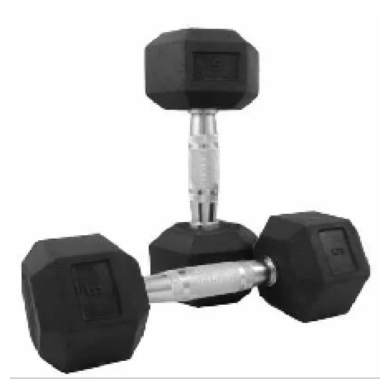

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Class: dumb_bell, Confidence: 1.00


In [8]:
# Example prediction
new_image_path = '/content/dumbell_test.webp'  # Replace with the path to your image
predicted_class, confidence = predict_image(new_image_path)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}")

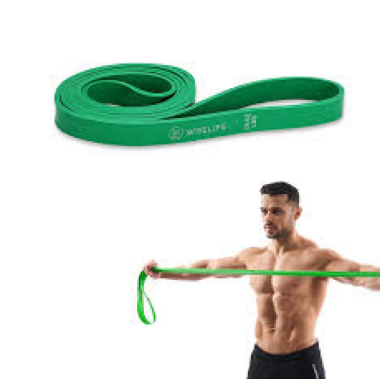

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Class: Resistance bands, Confidence: 0.96


In [9]:
# Example prediction
new_image_path = '/content/bandtest.jpeg'  # Replace with the path to your image
predicted_class, confidence = predict_image(new_image_path)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}")